In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D
import sympy

東京大学数理・データサイエンスコンソーシアム 社会人向け講座 2019年秋

# 解析・線形代数入門 〜データサイエンスのための〜

# レポート課題2

解答者氏名: 

採点者氏名: 

* 以下のセルに解答・図を描くためのPythonスクリプト・プロットの結果を記入せよ。CodeセルやMarkdownセルは必要に応じて付け加えてもよい
* 記入したノートブックは採点者に送ること。採点者は採点・講評を記入した後、ファイルを解答者に返却するとともに、 https://sendfile.s.u-tokyo.ac.jp/public/z2vwgASJYEUAbyMBhHdudlIXCEFbLheU-1NHaHTSlQIN にアップロードせよ。(課題ごとにアップロードURLは異なっているので注意)
* アップロードするファイル名は「解答者氏名_採点者氏名.ipynb」、また氏名はフルネームとすること
* 提出締切: 11月7日(木) 17:00
* 質問や不明な点がある場合は、遠慮なく藤堂<[wistaria@phys.s.u-tokyo.ac.jp](mailto:wistaria@phys.s.u-tokyo.ac.jp)>まで

---
### 問2-1
(a) $f(x,y) = x^3+2 x^2 y + 2 x y^2 + y^3$ について、偏微分 $f_x$ と $f_y$ を求めよ

$f_x(x,y) = 3x^2 + 4xy + 2y^2$ <br>
$f_y(x,y) = 2x^2 + 4xy + 3y^2$

参考) sympyモジュールの利用

In [2]:
def f(x,y):
    return x**3 + 2 * x**2 * y + 2 * x * y**2 + y**3;
x = sympy.Symbol('x');
y = sympy.Symbol('y');

In [3]:
sympy.diff(f(x,y), x)

3*x**2 + 4*x*y + 2*y**2

In [4]:
sympy.diff(f(x,y), y)

2*x**2 + 4*x*y + 3*y**2

(b) $f(x,y) = x/y$ と $x(t)=1-2t$, $y(t) = 1+t^2$ の合成関数 $F(t) = f(x(t), y(t))$ の $t$ に関する微分を計算せよ

$f_x(x,y) = 1/y$, $f_y(x,y) = -x/y^2$, $dx(t)/dt = -2$, $dy(t)/dt = 2t$より<br>
$\displaystyle \frac{dF}{dt}(t) = f_x \frac{dx}{dt} + f_y \frac{dy}{dt} = \frac{1}{y} \cdot (-2) - \frac{x}{y^2} \cdot (2t) = \frac{(-2)(y+tx)}{y^2} = \frac{2(t^2-t-1)}{(t^2+1)^2}$

In [5]:
def x(t):
    return 1-2*t;
def y(t):
    return 1+t**2;
t =  sympy.Symbol('t');
sympy.simplify(sympy.diff(x(t)/y(t), t))

2*(t**2 - t - 1)/(t**4 + 2*t**2 + 1)

###  問2-1 採点・講評

---
### 問2-2
関数 $f(x,y) = x^2+xy+y^2 - 4x - 2y$ の最小値を勾配降下法で数値的に求めよう<br>
(a) $z=f(x,y)$を3Dプロットして、関数の概形を確かめよ

<IPython.core.display.Javascript object>


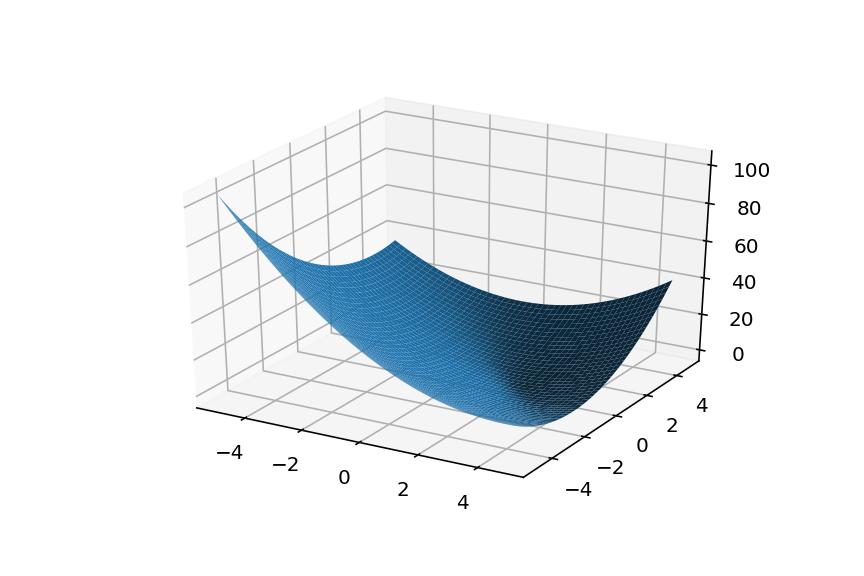

In [6]:
%matplotlib notebook
def f(x, y):
    return x**2 + x*y + y**2 - 4*x - 2*y;
x, y = numpy.mgrid[-5:5:0.2, -5:5:0.2];
fig = pyplot.figure();
ax = fig.add_subplot(111, projection='3d');
ax.plot_surface(x, y, f(x,y));

(b) 偏微分 $f_x$, $f_y$ を求めよ

$f_x = 2x+y-4$<br>
$f_y = x + 2y - 2$

In [7]:
x = sympy.Symbol('x');
y = sympy.Symbol('y');
sympy.diff(f(x,y), x)

2*x + y - 4

In [8]:
sympy.diff(f(x,y), y)

x + 2*y - 2

(c) 初期条件を$(x,y)=(0,0)$とする。この点において、$f_x$と$f_y$の値を求め、$x \leftarrow x - \epsilon f_x$、$y \leftarrow y - \epsilon f_y$ により、新しい点$(x,y)$を求めよ。ただし、$\epsilon=0.1$とする

In [9]:
def fx(x, y):
    return 2*x + y - 4;
def fy(x, y):
    return x + 2*y - 2;
x = 0;
y = 0;
epsilon = 0.1;
x = x - epsilon * fx(x, y);
y = y - epsilon * fy(x, y);
print(x, y);

0.4 0.16000000000000003


(d) (b)を数十回くりかえし、収束先$(x^*, y^*)$を予測せよ

In [10]:
x = 0;
y = 0;
epsilon = 0.1;
for i in range(100):
    x = x - epsilon * fx(x, y);
    y = y - epsilon * fy(x, y);
    if (i+1) % 10 == 0: # 10回ごとに出力
        print(i+1, x, y);

10 1.6529883501883371 0.2617707589272947
20 1.8969640010541364 0.09512024856714733
30 1.9665603417224171 0.03154605424188441
40 1.9890368779059415 0.01036630118656212
50 1.99640183787698 0.003403125692038665
60 1.9988189236657443 0.001117086369994235
70 1.99961231353456 0.0003666829004803631
80 1.9998727423517937 0.00012036328809032953
90 1.9999582278134784 3.950912149306335e-05
100 1.9999862883243706 1.2968826994773804e-05


$(x^*, y^*) = (2,0)$と予測される

(e) $f_x(x^*,y^*) = f_y(x^*,y^*) = 0$ となっていることを確認せよ

In [11]:
print(fx(2, 0));
print(fy(2, 0));

0
0


### 問2-2 採点・講評

---
### 問2-3
拘束条件 $g(x,y) = x^2 + y^2 = 1$ の下で目的関数 $f(x,y) = (x+y)^2$ の最大値を求めよ<br>
(a) $g(x,y)$ の等高線を描き、$g(x,y) = 1$の曲線の形を確認せよ

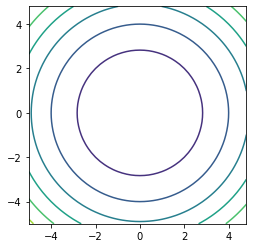

In [12]:
%matplotlib inline
def g(x, y):
    return x**2 + y**2;
x, y = numpy.mgrid[-5:5:0.2, -5:5:0.2];
pyplot.contour(x, y, g(x, y));
pyplot.gca().set_aspect('equal');

$g(x, y) = 1$は原点が中心の半径1の円

(b) $f(x,y)$ の等高線を描け

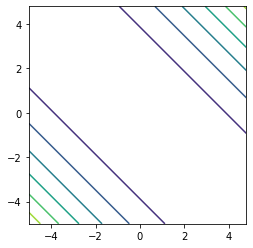

In [13]:
%matplotlib inline
def f(x, y):
    return (x + y)**2;
pyplot.contour(x, y, f(x, y));
pyplot.gca().set_aspect('equal');

(c) ラグランジュ未定乗数 $\lambda$ を導入して、$F(x,y,\lambda) = f(x,y) - \lambda (g(x,y)-1)$ を定義し、連立方程式$F_x=0$, $F_y=0$, $F_\lambda=0$を解け

$F(x,y,\lambda) = f(x,y) - \lambda ( g(x,y) - 1) = (x+y)^2 - \lambda(x^2+y^2 - 1)$ <br>
$\displaystyle F_x = 2(x+y) - 2\lambda x = 0 \qquad (1)$<br>
$\displaystyle F_y = 2(x+y) - 2\lambda y = 0 \qquad (2)$<br>
$\displaystyle F_\lambda = x^2+y^2 - 1 = 0 \qquad (3)$<br>
(1)-(2)より$\lambda(x-y)=0$ → $\lambda = 0$あるいは$y=x$<br>
$\lambda = 0$ を(1)に代入すると $y=-x$<br>
$y=x$に代入すると$2x^2=1$ → $\displaystyle x = \pm \frac{\sqrt{2}}{2}$、$\displaystyle y = \pm \frac{\sqrt{2}}{2}$ (複合同順)<br>
$y=-x$を代入しても$2x^2=1$ → $\displaystyle x = \pm \frac{\sqrt{2}}{2}$、$\displaystyle y = \mp \frac{\sqrt{2}}{2}$ (複合同順)<br>
まとめると、
$\displaystyle \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \end{bmatrix}, \begin{bmatrix} \frac{\sqrt{2}}{2} \\ -\frac{\sqrt{2}}{2} \end{bmatrix}, \begin{bmatrix} -\frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \end{bmatrix}, \begin{bmatrix} -\frac{\sqrt{2}}{2} \\ -\frac{\sqrt{2}}{2} \end{bmatrix}$
の4つの解がある

(d) (c)の連立方程式には4つの解がある。それぞれの解について$f(x,y)$の値を確認し、$f(x,y)$の最大値と最大値を取る点$(x,y)$を求めよ

$\displaystyle \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \end{bmatrix}, \begin{bmatrix} -\frac{\sqrt{2}}{2} \\ -\frac{\sqrt{2}}{2} \end{bmatrix}$で最大値$f(x,y)=2$、
$\displaystyle \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} \frac{\sqrt{2}}{2} \\ -\frac{\sqrt{2}}{2} \end{bmatrix}, \begin{bmatrix} -\frac{\sqrt{2}}{2} \\ +\frac{\sqrt{2}}{2} \end{bmatrix}$で最小値$f(x,y)=0$をとる

注) $\lambda=0$に相当する解(今の場合は最小値を与える解)では、等高線$f(x,y)=0$と$g(x,y)=1$は接していない(むしろここでは直交している)ことに注意。$f(x,y)=0$の等高線$x+y=0$は、もともと$f(x,y)$の最小値となっている。そのような場合は、等高線が互いに接する必要はなく、単に$f(x,y)=0$と$g(x,y)=1$を連立して解けばよい

### 問2-3 採点・講評